In [53]:
# 导入必要的库
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture



In [54]:
# 产生实验数据 - 球形分布
X_spherical, y_true_spherical = make_blobs(n_samples=400, centers=4,
                                           cluster_std=0.60, random_state=0)
X_spherical = X_spherical[:, ::-1]  # 交换列是为了方便画图

# 产生实验数据 - 椭圆形分布
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_elliptical = np.dot(X_spherical, transformation)



In [55]:
# 合并数据集
X = np.vstack([X_spherical, X_elliptical])

In [56]:
# 使用 GMM 进行聚类
gmm = GaussianMixture(n_components=4).fit(X)
probs = gmm.predict_proba(X)



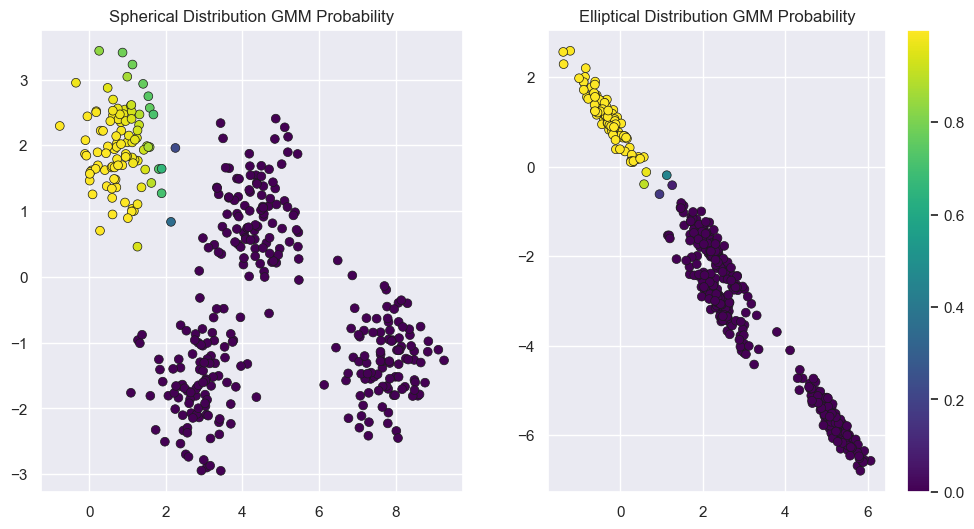

In [57]:
# 绘制色温图
plt.figure(figsize=(12, 6))

# 绘制球形分布数据的色温图
plt.subplot(1, 2, 1)
plt.scatter(X_spherical[:, 0], X_spherical[:, 1], c=probs[:400, 0], cmap='viridis', s=40, edgecolors='k', linewidths=0.5)
plt.title('Spherical Distribution GMM Probability')

# 绘制椭圆形分布数据的色温图
plt.subplot(1, 2, 2)
plt.scatter(X_elliptical[:, 0], X_elliptical[:, 1], c=probs[400:, 0], cmap='viridis', s=40, edgecolors='k', linewidths=0.5)
plt.title('Elliptical Distribution GMM Probability')

plt.colorbar()
plt.show()